In [123]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [124]:
df21 = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv")
df = pd.read_csv("/kaggle/input/world-happiness-report-2021/world-happiness-report.csv")

Text(0.5, 1.0, 'Happiness Score')

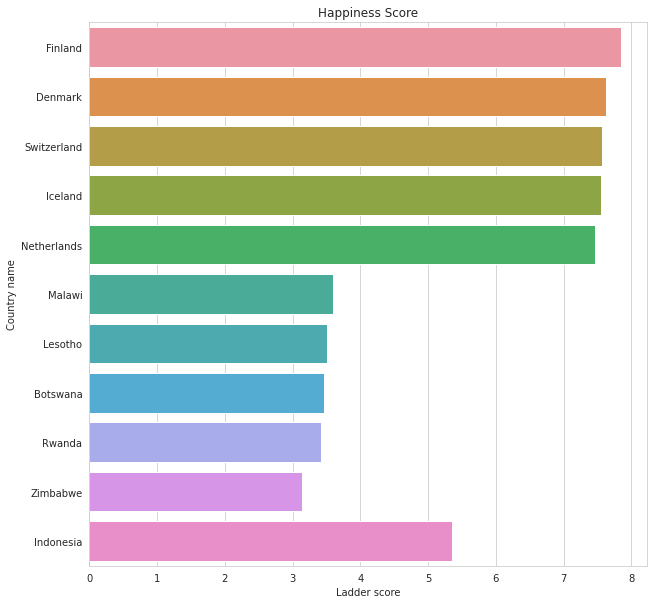

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.barplot(x = "Ladder score", y = "Country name", data=df21.iloc[0:5].append(df21.iloc[-6:-1].append(df21[df21["Country name"] == "Indonesia"])) )
plt.title("Happiness Score")

In [126]:
countries = df21["Country name"].unique()

In [127]:
pivot = pd.pivot_table(df, index="Country name", columns = 'year', values = "Life Ladder")

In [128]:
pivot

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country name,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,3.724,4.402,4.758,3.832,3.783,3.572,3.131,3.983,4.220,2.662,2.694,2.375,NaN
Albania,NaN,NaN,4.634,NaN,5.485,5.269,5.867,5.510,4.551,4.814,4.607,4.511,4.640,5.004,4.995,5.365
Algeria,NaN,NaN,NaN,NaN,NaN,5.464,5.317,5.605,NaN,6.355,NaN,5.341,5.249,5.043,4.745,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,5.589,4.360,3.937,3.795,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,6.313,6.073,5.961,6.424,6.441,6.776,6.468,6.582,6.671,6.697,6.427,6.039,5.793,6.086,5.901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,7.17,6.525,NaN,6.258,7.189,7.478,6.580,7.067,6.553,6.136,5.569,4.041,5.071,5.006,5.081,4.574
Vietnam,NaN,5.294,5.422,5.480,5.304,5.296,5.767,5.535,5.023,5.085,5.076,5.062,5.175,5.296,5.467,NaN
Yemen,NaN,NaN,4.477,NaN,4.809,4.350,3.746,4.061,4.218,3.968,2.983,3.826,3.254,3.058,4.197,NaN


In [129]:
temp = df21[["Country name", "Ladder score"]].set_index("Country name")
temp = temp["Ladder score"].rename(2021)
temp

Country name
Finland        7.842
Denmark        7.620
Switzerland    7.571
Iceland        7.554
Netherlands    7.464
               ...  
Lesotho        3.512
Botswana       3.467
Rwanda         3.415
Zimbabwe       3.145
Afghanistan    2.523
Name: 2021, Length: 149, dtype: float64

In [130]:
pivot = pivot.join(temp)

In [133]:
pt = pivot.transpose()

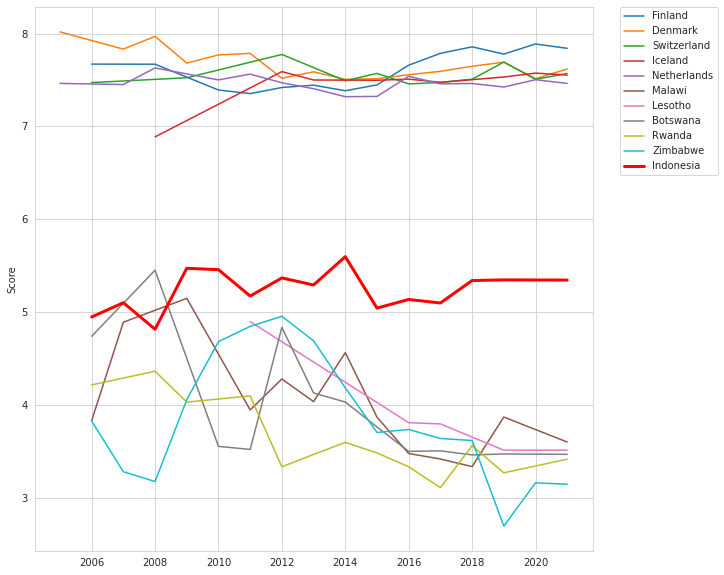

In [138]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(figsize=(10,10))
# plt.figure(figsize=(10,10))
axes.set_ylabel("Score")
for country in countries[0:5]:
    sns.lineplot(ax = axes, x = pt[country].index, y = country, data=pt, label=country)
    
for country in countries[-6:-1]:
    sns.lineplot(ax = axes, x = pt[country].index, y = country, data=pt, label=country)

sns.lineplot(ax = axes, x = pt["Indonesia"].index, y = "Indonesia", data=pt, label="Indonesia", linewidth = 3, color="red")
# for country in countries[-6:-1]:
#     sns.lineplot(ax = axes, x = "year", y = "Life Ladder", data=df[df["Country name"] == country], label=country)
# sns.lineplot(ax = axes, x = "year", y = "Life Ladder", data=df[df["Country name"] == "Indonesia"], label="Indonesia", linewidth = 3, color="red")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [139]:
generosity = df21.sort_values("Generosity",ascending = False)

Text(0.5, 1.0, 'Generosity')

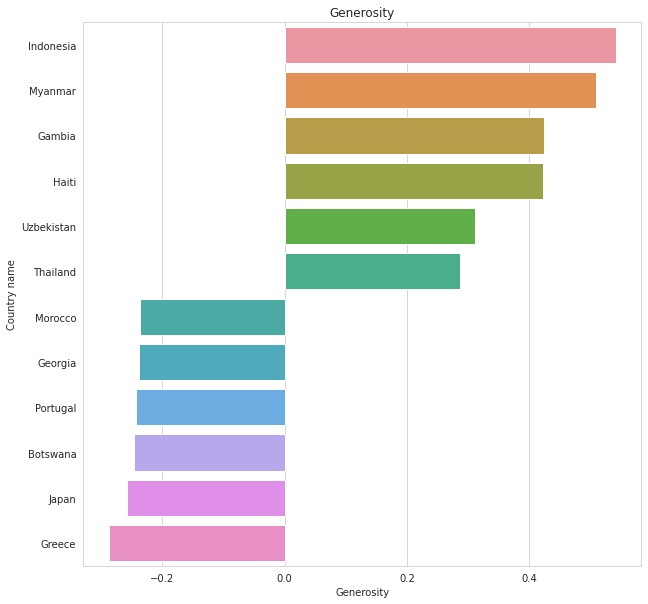

In [153]:
plt.figure(figsize=(10,10))
sns.barplot(x="Generosity", y="Country name", data = generosity.iloc[0:6].append(generosity.iloc[-6:]))
plt.title("Generosity")

In [142]:
gdp = df21.sort_values("Logged GDP per capita",ascending = False)
gdp

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.600,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
31,Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
14,Ireland,Western Europe,7.085,0.040,7.164,7.006,11.342,0.947,72.400,0.879,0.077,0.363,2.43,1.644,1.092,0.753,0.606,0.238,0.367,2.384
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
24,United Arab Emirates,Middle East and North Africa,6.561,0.039,6.637,6.484,11.085,0.844,67.333,0.932,0.074,0.589,2.43,1.555,0.860,0.594,0.670,0.236,0.223,2.422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Liberia,Sub-Saharan Africa,4.625,0.106,4.833,4.417,7.288,0.720,56.498,0.735,0.050,0.850,2.43,0.228,0.580,0.253,0.430,0.221,0.057,2.857
114,Mozambique,Sub-Saharan Africa,4.794,0.103,4.997,4.592,7.158,0.744,54.706,0.882,0.061,0.684,2.43,0.183,0.634,0.196,0.608,0.228,0.163,2.783
95,Niger,Sub-Saharan Africa,5.074,0.102,5.273,4.875,7.098,0.641,53.780,0.806,0.018,0.693,2.43,0.162,0.402,0.167,0.516,0.200,0.157,3.470
143,Malawi,Sub-Saharan Africa,3.600,0.092,3.781,3.419,6.958,0.537,57.948,0.780,0.038,0.729,2.43,0.113,0.168,0.298,0.484,0.213,0.134,2.190


Text(0.5, 1.0, 'Indonesia GDP vs Other Countries')

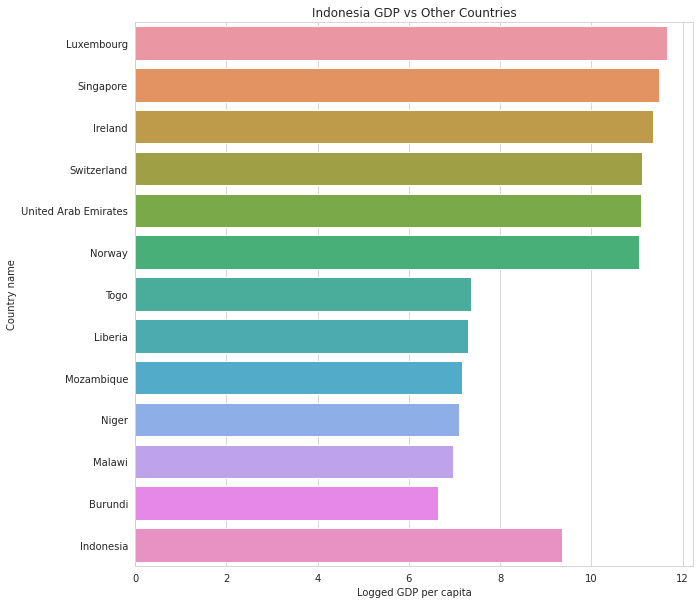

In [151]:
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Logged GDP per capita", y="Country name", data = gdp.iloc[0:6].append(gdp.iloc[-6:]).append(gdp[gdp["Country name"] == "Indonesia"]))
plt.title("Indonesia GDP vs Other Countries")

In [188]:
freedom = df21.sort_values("Freedom to make life choices",ascending = False)
freedom.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
41,Uzbekistan,Commonwealth of Independent States,6.179,0.068,6.312,6.045,8.836,0.918,65.255,0.970,0.311,0.515,2.43,0.769,1.027,0.528,0.716,0.391,0.271,2.477
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
113,Cambodia,Southeast Asia,4.830,0.067,4.963,4.698,8.360,0.765,62.000,0.959,0.034,0.843,2.43,0.603,0.680,0.426,0.702,0.210,0.061,2.148
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253


Text(0.5, 1.0, 'Freedom to make life choices')

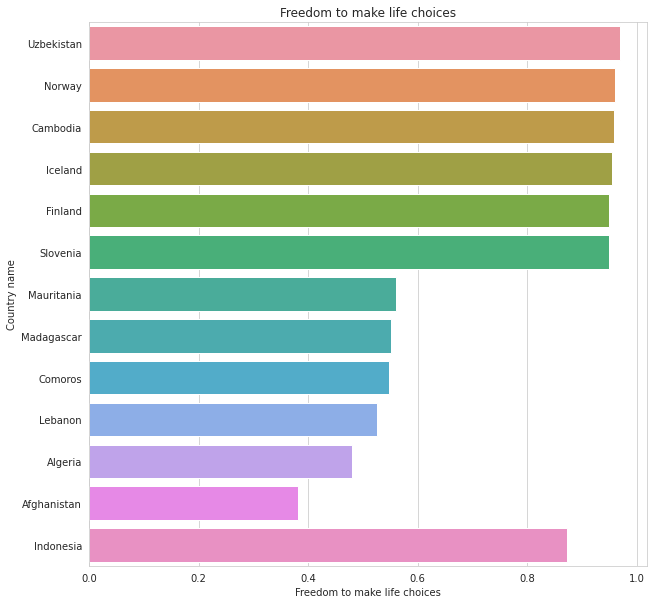

In [161]:
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Freedom to make life choices", y="Country name", data = freedom.iloc[0:6].append(freedom.iloc[-6:]).append(freedom[freedom["Country name"] == "Indonesia"]))
plt.title("Freedom to make life choices")

In [190]:
social = df21.sort_values("Social support",ascending = False)
social.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
96,Turkmenistan,Commonwealth of Independent States,5.066,0.036,5.136,4.996,9.629,0.983,62.409,0.877,0.273,0.888,2.43,1.046,1.172,0.439,0.602,0.366,0.033,1.409
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.300,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868


Text(0.5, 1.0, 'Social support')

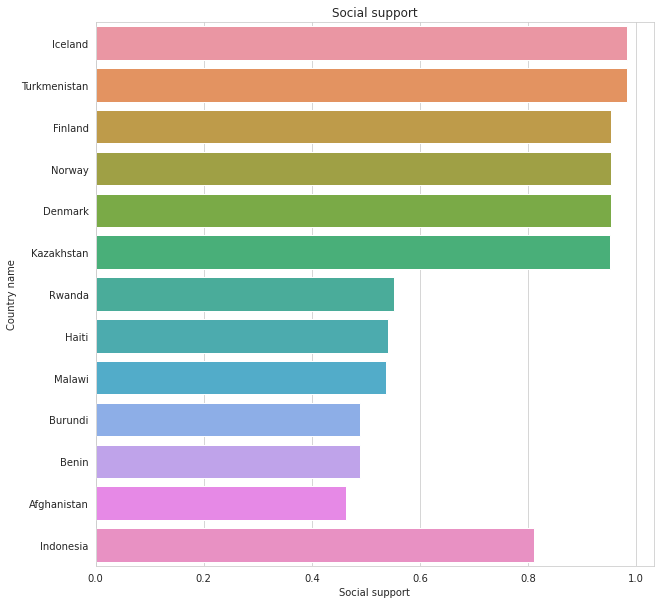

In [191]:
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Social support", y="Country name", data = social.iloc[0:6].append(social.iloc[-6:]).append(social[social["Country name"] == "Indonesia"]))
plt.title("Social support")

In [186]:
corruption = social = df21.sort_values("Perceptions of corruption",ascending = False)
corruption[21:30]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
52,Hungary,Central and Eastern Europe,5.992,0.047,6.085,5.899,10.358,0.943,68.000,0.755,-0.186,0.876,2.43,1.301,1.083,0.615,0.454,0.067,0.040,2.432
110,Iraq,Middle East and North Africa,4.854,0.059,4.970,4.738,9.240,0.746,60.583,0.630,-0.053,0.875,2.43,0.910,0.638,0.381,0.302,0.153,0.041,2.429
121,Tunisia,Middle East and North Africa,4.596,0.058,4.709,4.484,9.266,0.691,67.201,0.656,-0.201,0.870,2.43,0.919,0.515,0.590,0.334,0.057,0.044,2.138
17,Czech Republic,Central and Eastern Europe,6.965,0.049,7.062,6.868,10.556,0.947,70.807,0.858,-0.208,0.868,2.43,1.370,1.090,0.703,0.580,0.052,0.046,3.124
81,Indonesia,Southeast Asia,5.345,0.056,5.454,5.235,9.365,0.811,62.236,0.873,0.542,0.867,2.43,0.954,0.786,0.433,0.598,0.541,0.046,1.987
137,Sierra Leone,Sub-Saharan Africa,3.849,0.077,4.001,3.698,7.434,0.630,51.651,0.717,0.084,0.866,2.43,0.279,0.377,0.100,0.408,0.243,0.047,2.396
27,Italy,Western Europe,6.483,0.045,6.572,6.395,10.623,0.880,73.800,0.693,-0.084,0.866,2.43,1.393,0.940,0.798,0.379,0.133,0.047,2.794
128,Sri Lanka,South Asia,4.325,0.066,4.454,4.196,9.470,0.827,67.299,0.841,0.079,0.863,2.43,0.990,0.820,0.593,0.559,0.239,0.049,1.075
102,South Africa,Sub-Saharan Africa,4.956,0.060,5.074,4.839,9.403,0.860,56.904,0.749,-0.067,0.860,2.43,0.967,0.895,0.265,0.447,0.144,0.051,2.187


Text(0.5, 1.0, 'Perceptions of corruption')

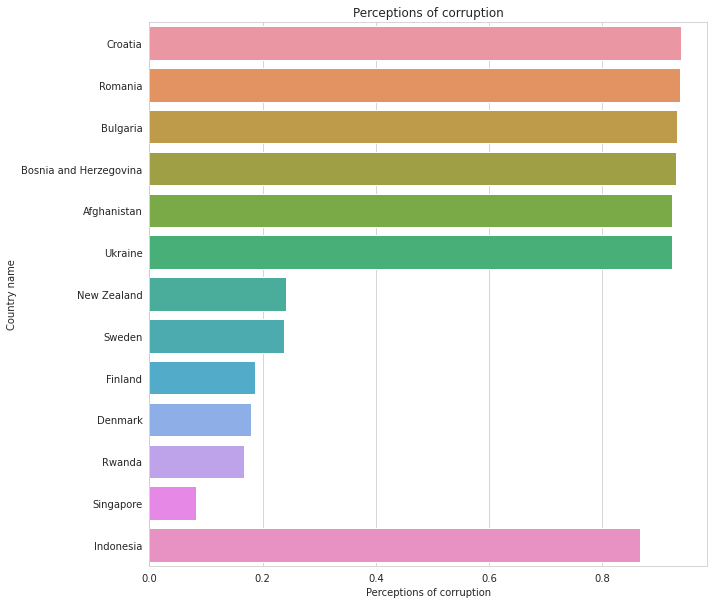

In [187]:
fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(ax=axes, x="Perceptions of corruption", y="Country name", data = corruption.iloc[0:6].append(corruption.iloc[-6:]).append(corruption[corruption["Country name"] == "Indonesia"]))
plt.title("Perceptions of corruption")